## following https://www.cs.cmu.edu/~kmcrane/Projects/MonteCarloGeometryProcessing/index.html

In [120]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np

def closestPoint(p, segment):
    v = segment[1] - segment[0]
    t = abs(np.dot(v, p - segment[0]) / np.dot(v, v))
    return t * segment[1] + (1-t)*segment[0]

def G(r, R):
    GrR = np.log(R/r) / (2 * np.pi)
    if np.isnan(GrR):
        return 0
    else:
        return GrR

def solve(x, segments, f, g):
    eps = 0.001
    nWalks = 32
    maxSteps = 16
    
    u=0
    
    for i in range(nWalks):
        x_cur = x
        step_cur = 0
        R = min([np.linalg.norm(closestPoint(x_cur, s) - x_cur) for s in segments])
        while R > eps and step_cur <= maxSteps:
            # random y
            alpha = np.sqrt(np.random.uniform())
            theta = np.random.uniform(0, 2*np.pi)
            r = alpha * R
            y = x_cur + r * np.array([np.cos(theta), np.sin(theta)])
            u += np.pi * R * R * G(r, R) * f(y)
            #random x
            theta = np.random.uniform(0, 2*np.pi)
            x_cur = x_cur + R * np.array([np.cos(theta), np.sin(theta)])
            R = min([np.linalg.norm(closestPoint(x_cur, s) - x_cur) for s in segments])
            step_cur += 1
        u += g(x_cur)
                                     
    return u / nWalks

uref = lambda x: np.cos(2*np.pi*x[0]) * np.sin(2*np.pi*x[1])
L_uref =  lambda x: 8 * np.pi* np.pi*np.cos(2*np.pi*x[0]) * np.sin(2*np.pi*x[1])

segments = [(np.array([0.,.0]),np.array([1.,.0])), (np.array([1.,0.]),np.array([1.,1.])), 
            (np.array([1.,1.]),np.array([0.,1.])), (np.array([0.,1.]),np.array([0.,0.])) ]

res = 64
solution = np.zeros((res, res))
solution_ref = np.zeros((res, res))


for i in range(res):
    print(i)
    for j in range(res):
        p = np.array([i / res, j / res])
        solution[i][j] = solve( p, segments, L_uref, uref)
        solution_ref[i][j] = uref(p)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63


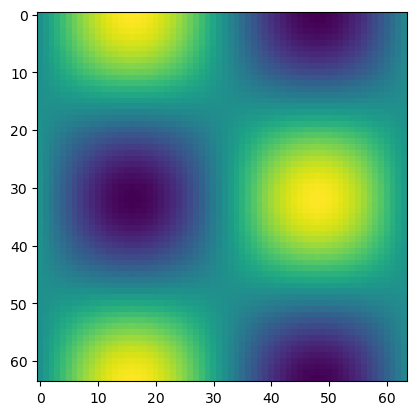

In [121]:
plt.imshow(solution_ref / np.max(abs(solution_ref)))
plt.show()

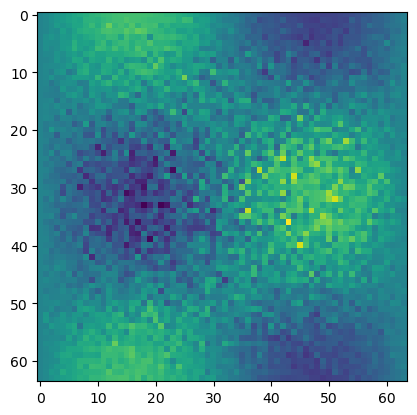

In [122]:
plt.imshow(solution / np.max(abs(solution)))
plt.show()